In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from matplotlib import cm
import quantecon as qe
from model_simple import FireProblem

In [2]:
# === input wage data === #
w = np.tile(np.arange(30,40,1),100)
w.size

1000

In [3]:
# === solve for the value function === #
fp = FireProblem(w,y_0=-1,sig2_0=0.5,sig2_star=1)
v_init = np.ones((fp.n,fp.y.size, fp.t.size))
v = qe.compute_fixed_point(fp.bellman_operator, v_init,print_skip=1, max_iter=1000)

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
1            7.028e+00      1.666e+02         
2            1.178e+00      3.312e+02         
3            8.754e-01      4.992e+02         
4            6.504e-01      6.639e+02         
5            4.833e-01      8.287e+02         
6            3.591e-01      9.930e+02         
7            2.668e-01      1.158e+03         
8            1.982e-01      1.331e+03         
9            1.473e-01      1.498e+03         
10           1.094e-01      1.666e+03         
11           8.129e-02      1.834e+03         
12           6.040e-02      2.002e+03         
13           4.487e-02      2.170e+03         
14           3.334e-02      2.336e+03         
15           2.477e-02      2.501e+03         
16           1.841e-02      2.667e+03         
17           1.367e-02      2.833e+03         
18           1.016e-02      2.999e+03         
19           7.549e-03      3.164e+03         
20           5.

In [4]:
# === solve for the optimal policy === #
optimal_policy = fp.get_greedy(v)

In [5]:
%matplotlib inline

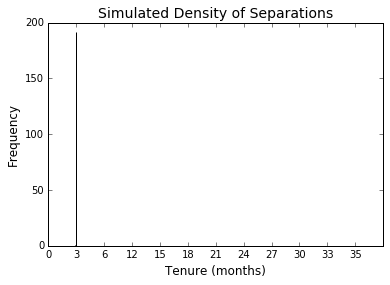

In [23]:
# === histogram of firings === #
beliefs = fp.firm_beliefs()
bins = fp.firing_bins(optimal_policy,beliefs) # simulated moments

L = len(bins)
ind = np.arange(L)  # the locations for the bars
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(ind, bins, width, color='r')

ax.set_xlabel('Tenure (months)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Simulated Density of Separations', fontsize=14)

ax.set_xlim(0,fp.T_star+1)
labels = [0, 3, 6, 12, 15, 18, 21, 24, 27, 30, 33, 35]
plt.xticks(np.linspace(0, fp.T_star+1, (fp.T_star+1)/fp.T_k+1), labels)

plt.show()

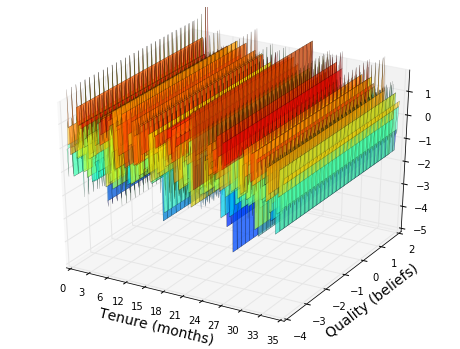

In [25]:
# === plot value function (for some worker) === #
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
tg, yg = np.meshgrid(fp.t, fp.y)
ax.plot_surface(tg,
                yg,
                v[770,:,:], #for worker 7
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.5,
                linewidth=0.25)
ax.set_zlim(np.amin(v[0,:,:])-0.5, np.amax(v[0,:,:])+0.5)
ax.set_xlabel('Tenure (months)', fontsize=14)
ax.set_ylabel('Quality (beliefs)', fontsize=14)
ax.set_xlim(0,fp.T_star)
labels = [0, 3, 6, 12, 15, 18, 21, 24, 27, 30, 33, 35]
plt.xticks(np.linspace(0, fp.T_star+1, (fp.T_star+1)/fp.T_k), labels)
plt.show()

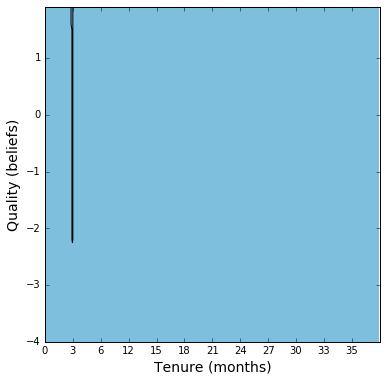

In [26]:
# === plot the optimal policy (for some worker) === #
fig, ax = plt.subplots(figsize=(6,6))
tg, yg = np.meshgrid(fp.t, fp.y)
lvls=(-0.5, 0.5)
ax.contourf(tg, yg, optimal_policy[770,:,:], levels=lvls, cmap=cm.winter, alpha=0.5) #for worker 770
ax.contour(tg, yg, optimal_policy[770,:,:], colors='k', levels=lvls, linewidths=1) #for worker 770
ax.set_xlabel('Tenure (months)', fontsize=14)
ax.set_ylabel('Quality (beliefs)', fontsize=14)
ax.set_xlim(0,fp.T_star+1)
labels = [0, 3, 6, 12, 15, 18, 21, 24, 27, 30, 33, 35]
plt.xticks(np.linspace(0, fp.T_star+1, (fp.T_star+1)/fp.T_k+1), labels)
plt.show()

In [27]:
# np.unique(np.where(optimal_policy==1)[0]) #check workers who have potential firings
# np.unique(np.where(optimal_policy==1)[2]) #check periods of potential firings
# np.where(optimal_policy[:,:,30]==1) #check workers/beliefs who are fired in a given period